In [1]:
!pip install scikit-learn
!pip install graphviz
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import matplotlib as plt # data visualization
#import matplotlib.pyplot as plt
import seaborn as sns #data visualization
import random

random.seed(1)
pokemon = pd.read_csv("pokemon.csv", header = 0)
combat = pd.read_csv("combats.partial.csv", header = 0)
combat.head()

,Winner,First_pokemon,Second_pokemon
0,650,650,579
1,151,151,558
2,340,340,631
3,139,688,139
4,132,365,132


In [4]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [5]:
# stampo la dimensione dei dati
print("Dimensione di Pokemon:" + str(pokemon.shape))
print("Dimensione di Combat:" + str(combat.shape))

Dimensione di Pokemon:(800, 12)
Dimensione di Combat:(40000, 3)


In [6]:
# controllo se ci sono dati mancanti in pokemon
pokemon.isnull().sum()

#               0
Name            1
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [7]:
# controllo se ci sono dati mancanti in combat
combat.isnull().sum()

Winner            0
First_pokemon     0
Second_pokemon    0
dtype: int64

In [8]:
# rinomino la colonna "#" con "id"
pokemon.rename(columns={'#': 'id'}, inplace=True)
# la colonna "Name" ha solo un elemento pari a null, ma non servirà per l'addestramento
pokemon = pokemon.drop(['Name'],1)
# la colonna "Generation" indica la stagione in cui il pokemon è comparso per la prima volta, ma non servirà per l'addestramento
pokemon = pokemon.drop(['Generation'],1)
# la colonna "Type" ha tanti elementi nulli, quindi può essere scartata
pokemon = pokemon.drop(['Type 2'],1)
pokemon.head()

,id,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
0,1,Grass,45,49,49,65,65,45,False
1,2,Grass,60,62,63,80,80,60,False
2,3,Grass,80,82,83,100,100,80,False
3,4,Grass,80,100,123,122,120,80,False
4,5,Fire,39,52,43,60,50,65,False


In [9]:
# controllo se ho ancora dati nulli
pokemon.isnull().sum()

id           0
Type 1       0
HP           0
Attack       0
Defense      0
Sp. Atk      0
Sp. Def      0
Speed        0
Legendary    0
dtype: int64

In [14]:
# mostro le statistiche
pokemon.describe()

,id,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000


In [15]:
# ora vedo se c'è qualche pokemon che non ha mai vinto
# se esiste, non comparirà in "vittorie_totali"
# inserisco il numero di vittorie di ogni pokemon in ordine decrescente
vittorie_totali = combat.Winner.value_counts()
# conto il numero di pokemon che si trova nella colonna "First_pokemon" in combat
pokemon_totali_1 = combat.groupby("First_pokemon").count()
# conto il numero di pokemon che si trova nella colonna "Second_pokemon" in combat
# il risultato sarà lo stesso di "pokemon_totali_1"
pokemon_totali_2 = combat.groupby("Second_pokemon").count()
# stampo la dimensione di "vittorie_totali" e di "pokemon_totali_1"
# se il numero di vittorie è minore del numero di pokemon
# allora esiste qualche pokemon che non ha mai vinto
print("pokemon totali: " + str(pokemon_totali_1.shape))
print("vittorie totali: " + str(vittorie_totali.shape))

pokemon totali: (784, 2)
vittorie totali: (783,)


In [19]:
# la differenza tra i due valori è 1
# quindi un pokemon non ha mai vinto
# cerco qual è
numero_vittorie = combat.groupby('Winner').count()
# sottraggo 1 perché l'indice e il numero sono sfasati di 1
trova_pokemon = np.setdiff1d(pokemon_totali_1.index.values, numero_vittorie.index.values) - 1
pokemon_perdente = pokemon.iloc[trova_pokemon[0],]
print(pokemon_perdente)

id             231
Type 1         Bug
HP              20
Attack          10
Defense        230
Sp. Atk         10
Sp. Def        230
Speed            5
Legendary    False
Name: 230, dtype: object


In [20]:
# vedo se c'è qualche pokemon che non ha mai fatto sfide
# numero di vittorie per ogni pokemon
numero_vittorie = combat.groupby('Winner').count()
# ordino in modo crescente
numero_vittorie = numero_vittorie.sort_index()
numero_vittorie['Total Fights'] = pokemon_totali_1.Winner + pokemon_totali_2.Winner
numero_vittorie['Win Percentage']= numero_vittorie.First_pokemon/numero_vittorie['Total Fights']
# ad ogni pokemon aggiungo il numero di vittorie e la percentuale di vincita
risultati_2 = pd.merge(pokemon, numero_vittorie, right_index = True, left_on='id')
risultati = pd.merge(pokemon, numero_vittorie, left_on='id', right_index = True, how='left')
# stampo i dataframe con percentuale di vincita nulla
# cioè i pokemon che non hanno mai vinto o non hanno mai fatto sfide
risultati[risultati['Win Percentage'].isnull()].head()

,id,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
11,12,Water,79,83,100,85,105,78,False,NaN,NaN,NaN,NaN
32,33,Ground,50,75,85,20,30,40,False,NaN,NaN,NaN,NaN
45,46,Normal,140,70,45,85,50,45,False,NaN,NaN,NaN,NaN
65,66,Water,40,50,40,40,40,90,False,NaN,NaN,NaN,NaN
77,78,Grass,80,105,65,100,70,70,False,NaN,NaN,NaN,NaN


In [21]:
# esitono dei pokemon che non compaiono nemmeno una volta nel training set
# ordino per valori decrescenti della percentuale di vincita
risultati[np.isfinite(risultati['Win Percentage'])].sort_values(by = ['Win Percentage']).head()

,id,Type 1,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary,First_pokemon,Second_pokemon,Total Fights,Win Percentage
236,237,Fire,40,40,40,70,40,20,False,2.0,2.0,96.0,0.020833
576,577,Psychic,76,25,45,67,55,24,False,3.0,3.0,105.0,0.028571
289,290,Bug,50,35,55,25,25,15,False,3.0,3.0,98.0,0.030612
189,190,Fairy,35,20,65,40,65,20,False,3.0,3.0,94.0,0.031915
638,639,Psychic,45,30,40,105,50,20,False,4.0,4.0,103.0,0.038835


In [22]:
# vediamo che relazione c'è tra "Win Percentage" e "Type 1"
risultati.groupby('Type 1').agg({"Win Percentage": "mean"}).sort_values(by = "Win Percentage")

,Win Percentage
Type 1,
Fairy,0.331437
Rock,0.404328
Steel,0.421883
Ice,0.434821
Grass,0.436504
Bug,0.437356
Poison,0.440285
Water,0.467251
Fighting,0.475921


In [23]:
# i "Type 1" Electric, Dragon e Flying hanno la più alta percentuale di vincita
# potrebbero essere i tipi di pokemon con attacchi migliori degli altri

Text(0.5, 1.0, 'Pokemon totali per Type 1')

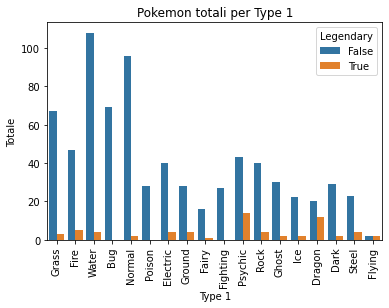

In [25]:
import matplotlib.pyplot as plt
# ora vedo come i pokemon sono distribuiti nei vari tipi
sns.set_color_codes("pastel")
ax = sns.countplot(x="Type 1", hue="Legendary", data=risultati)
# f.set_xticklabels(rotation=30)
plt.xticks(rotation= 90)
plt.xlabel('Type 1')
plt.ylabel('Totale')
plt.title("Pokemon totali per Type 1")

In [28]:
# i tipi con il più alto numero di pokemon sono Water, Bug, Normal, e Grass
# il tipo con il più basso numero di pokemon è Flying
# Flying è anche il tipo con percentuale di vittorie più alta

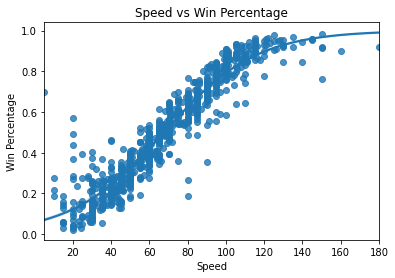

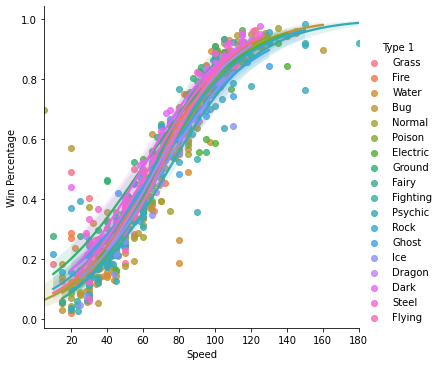

In [29]:
# vediamo che relazione c'è tra "Win Percentage" e le caratteristiche dei pokemon
import matplotlib.pyplot as plt
# f, (ax1, ax2) = plt.subplots(1,2)
sns.regplot(x="Speed", y="Win Percentage", data=risultati, logistic=True).set_title("Speed vs Win Percentage")
sns.lmplot(x="Speed", y="Win Percentage", data=risultati, hue = 'Type 1',  logistic=True)

In [30]:
# "Speed" e "Win Percentage" sembrano in qualche modo correlati

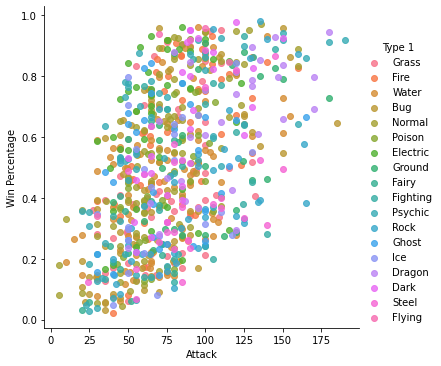

In [31]:
# ora vediamo che relazione c'è tra "Attack" e "Win Percentage"
sns.lmplot(x="Attack", y="Win Percentage", data=risultati, hue = 'Type 1',fit_reg =False)

In [32]:
# all'aumentare di "Attack", "Win Percentage" aumenta
# indipendentemente dal tipo del pokemon

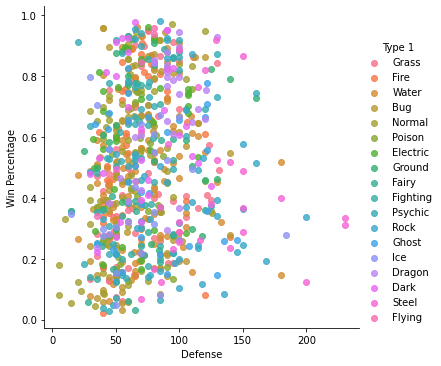

In [33]:
# ora vediamo che relazione c'è tra "Defense" e "Win Percentage"
sns.lmplot(x="Defense", y="Win Percentage", data=risultati, hue = 'Type 1',fit_reg =False)

In [34]:
# questo grafico non aggiunge nessuna informazione utile
# posso eliminare le features "Type 1" e "Legendary"
# poiché la feature che aggiunge più informazione è "Attack", che non dipende dalle altre due
pokemon = pokemon.drop(['Type 1','Legendary'],1)

In [35]:
from sklearn.model_selection import train_test_split
# aggiungo un'altra feature, che sarà il target
# varrà 1 se vince il primo pokemon, varrà 2 se vince il secondo pokemon
combat['WTag'] = np.where((combat['Winner'] == combat['First_pokemon']), 1, 2)
# divido i dati tra train e test set
train, test = train_test_split(combat, random_state=42,test_size=0.25)
# salvo i dati
# pokemon.to_csv('pokemon.csv',index=False)
train.to_csv('train.csv',index=False)
test.to_csv('test.csv',index=False)

In [36]:
pokemon.head()

,id,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,45,49,49,65,65,45
1,2,60,62,63,80,80,60
2,3,80,82,83,100,100,80
3,4,80,100,123,122,120,80
4,5,39,52,43,60,50,65
